## Lab 1: Auto MPG Regression Lab


In this lab, you will explore linear, polynomial, and non-linear regression models, and study the concepts of underfitting and overfitting. The lab is divided into three sections. In the first section, you will work with a single feature and a small number of examples to build an intuitive understanding of the problem. In the second section, you will tune the model by adjusting its hyperparameters to find the best-generalizing configuration. In the final section, you will use the full dataset and all available features to compare the performance of linear and non-linear regression models.

The experiments in this lab are based on the Cars dataset, where the objective is to predict a car’s fuel efficiency, measured in miles per gallon (MPG). The dataset includes several features describing vehicle characteristics, such as the number of cylinders, engine displacement, horsepower, vehicle weight, acceleration, and the model year of the car. These features capture both mechanical and design aspects of the vehicles and will be used to analyze the car fuel efficiency.


# Section 1:  Polynomial Regression – Single Feature

In this part, we use **weight** as the only feature to predict **MPG**.  

Tasks:
1. Fit polynomial regression with increasing degrees 1, 2, 3, 4, etc.
2. Plot the regression curve for each degree.
3. Calculate **MSE** and **R²** for each degree.
4. Understanding  underfitting vs overfitting.




###  Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


### Load the dataset

In [2]:
# URL from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin","car_name"]

# Load dataset
df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?')
df = df.dropna()  # Remove rows with missing horsepower
df.reset_index(drop=True, inplace=True)


X= df[['weight']].values
y = df['mpg'].values
X_scaled = X / X.max()

# Reduce dataset to 60 samples (for visualization clarity)
np.random.seed(42)
indices = np.random.choice(len(X_scaled), size=60, replace=False)

X = X_scaled[indices]
y = y[indices]

print("Shape of reduced dataset:", X.shape)



C:\Users\tonne\AppData\Local\Temp\ipykernel_15400\3358296894.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?')


Shape of reduced dataset: (60, 1)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 36
Test samples: 24


### Single Feature Polynomial Regression

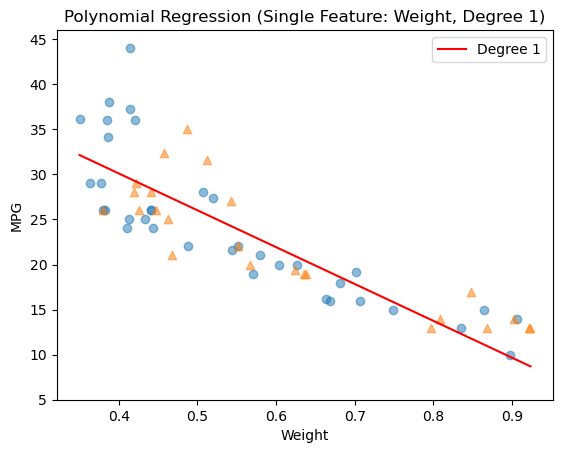

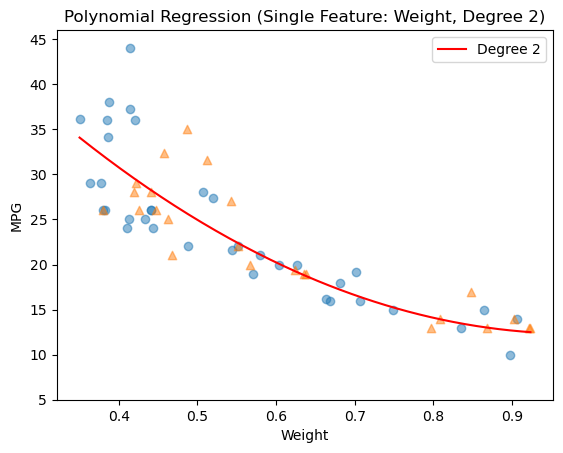

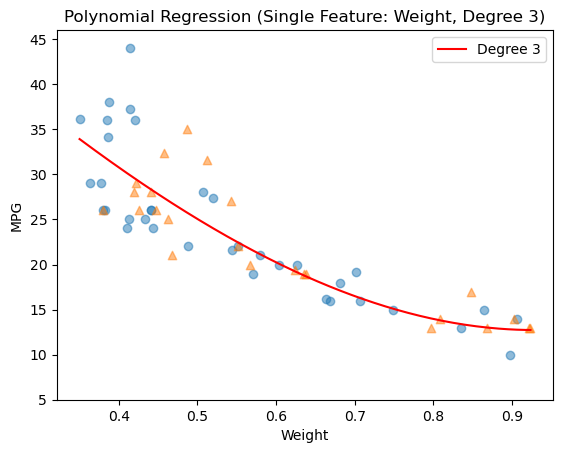

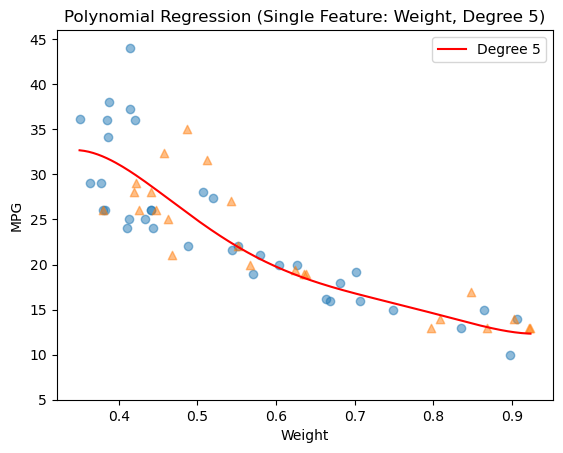

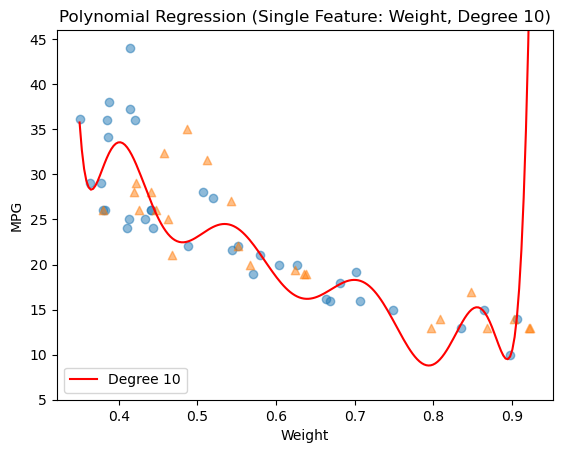

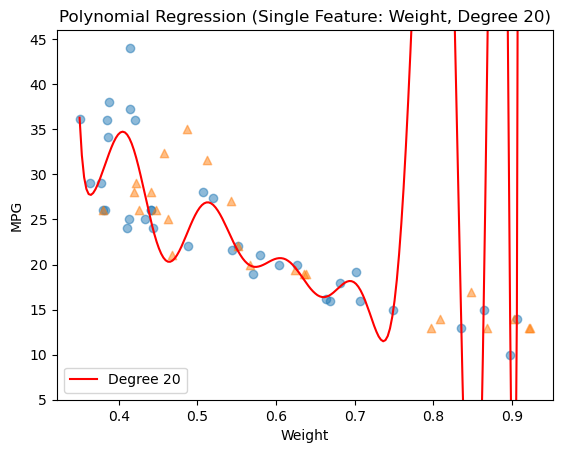

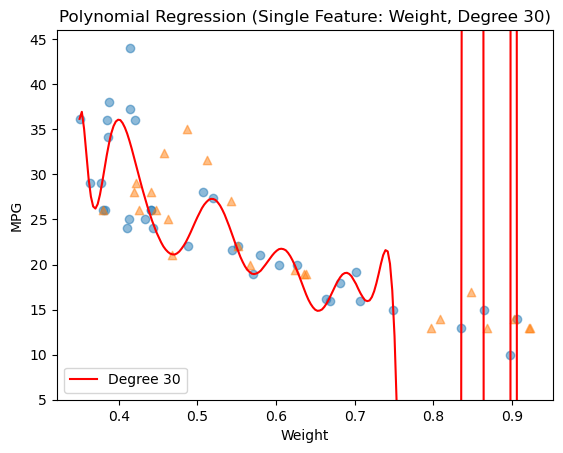

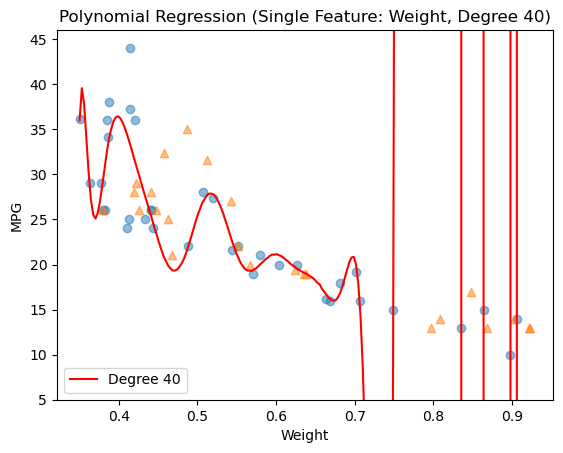

In [4]:
results_exp1 = []

for degree in [1, 2, 3, 5, 10, 20, 30, 40]:
    poly = PolynomialFeatures(degree)
    
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Prediction for plotting
    X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)
    plt.scatter(X_train, y_train, alpha=0.5)
    plt.scatter(X_test, y_test, alpha=0.5, marker='^')
    plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
    plt.title(f"Polynomial Regression (Single Feature: Weight, Degree {degree})")
    plt.xlabel("Weight")
    plt.ylabel("MPG")
    plt.legend()
    plt.ylim(5,46)
    plt.show()
    
    
    results_exp1.append({
        "Degree": degree,
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Train R²": r2_score(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred)
    })

### Summary table

In [5]:
exp1_df = pd.DataFrame(results_exp1)
display(exp1_df)


,Degree,Train MSE,Test MSE,Train R²,Test R²
0,1,19.691784,1.385517e+01,0.692877,6.920035e-01
1,2,17.831337,1.223378e+01,0.721894,7.280465e-01
2,3,17.824665,1.209093e+01,0.721998,7.312221e-01
3,5,17.657724,1.275222e+01,0.724601,7.165218e-01
4,10,14.393830,1.454539e+02,0.775507,-2.233398e+00
5,20,12.229877,8.692742e+05,0.809257,-1.932271e+04
6,30,11.862616,2.533374e+09,0.814985,-5.631616e+07
7,40,11.408872,3.862101e+12,0.822062,-8.585339e+10


# Section 2: Hyperparameters Tunning:

In this section, you will tune the degree of the polynomial model to identify the degree that achieves the best generalization performance. To do this, you will use a portion of the training data as a validation set to select the optimal degree. Afterward, you will evaluate the tuned model using previously unseen data (the test set) and report its performance.

## Spliting training dataset into train and validation

##### ADD CODE BLOCK BELOW TO SPLIT THE TRAING DATASET INTO TRAINING AND VALIDATION 


In [6]:
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train, y_train, test_size=0.4, random_state=42
)

print("Train size:", X_train2.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])

Train size: 21
Validation size: 15
Test size: 24


#### Below iterate on different values for degree 

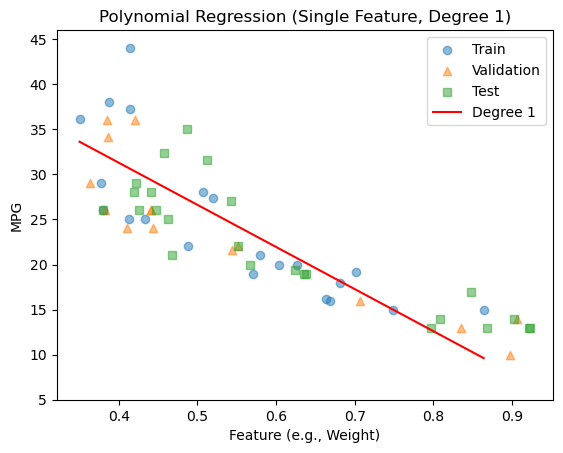

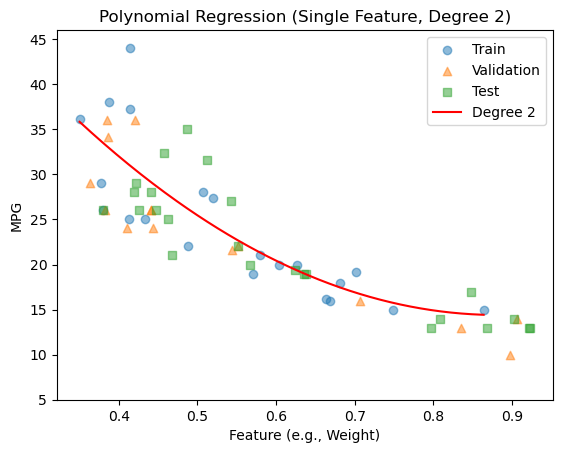

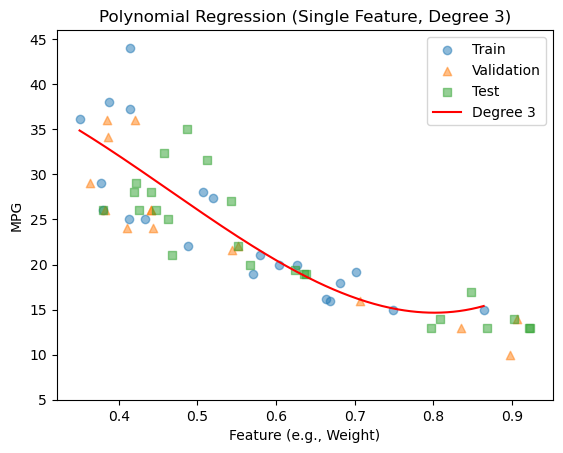

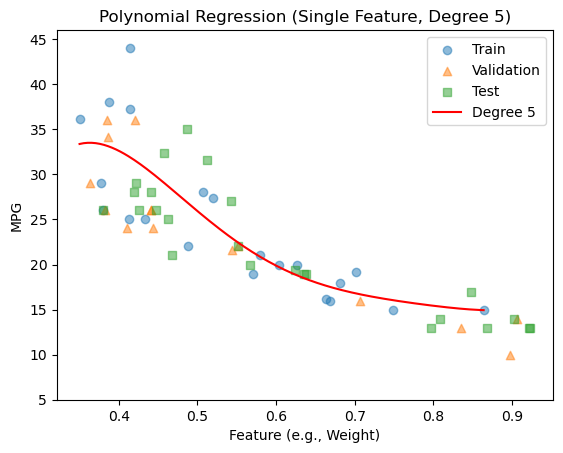

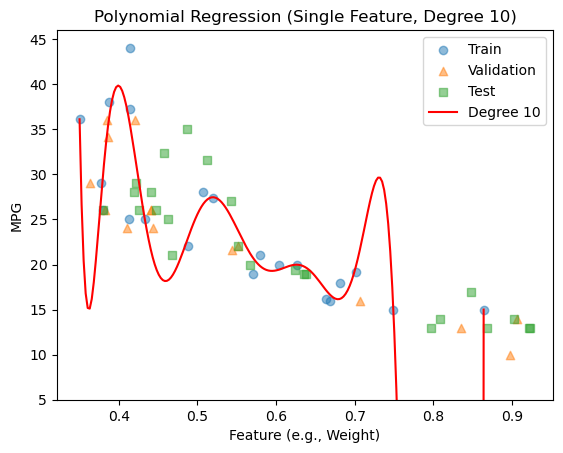

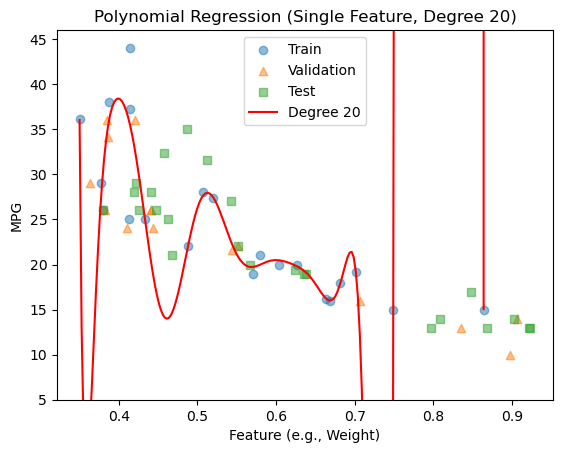

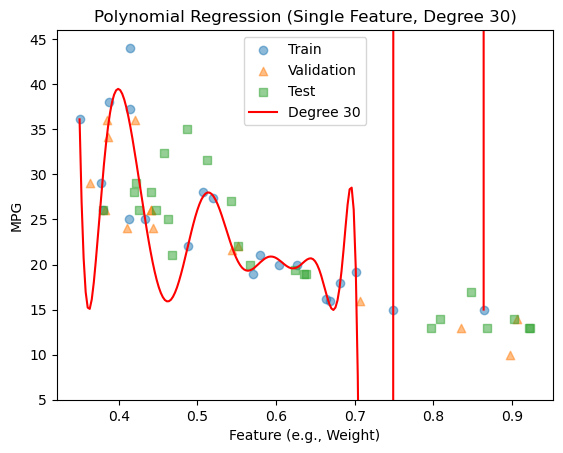

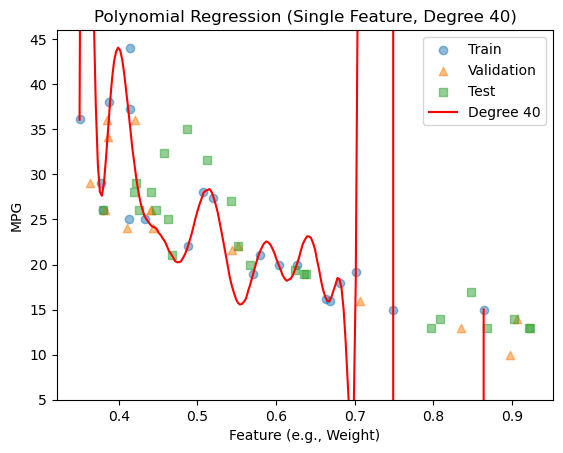

In [7]:
results_exp2 = []

for degree in [1, 2, 3, 5, 10, 20, 30, 40]:
    poly = PolynomialFeatures(degree)
    
    X_train_poly = poly.fit_transform(X_train2)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()

    #write the right arguments in the function below
    model.fit(X_train_poly, y_train2)
    
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    y_test_pred = model.predict(X_test_poly)
    
    #add the lines of code to plot at different degrees
    X_plot = np.linspace(X_train2.min(), X_train2.max(), 200).reshape(-1,1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.scatter(X_train2, y_train2, alpha=0.5, label="Train")
    plt.scatter(X_val, y_val, alpha=0.5, marker='^', label="Validation")
    plt.scatter(X_test, y_test, alpha=0.5, marker='s', label="Test")
    plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
    plt.title(f"Polynomial Regression (Single Feature, Degree {degree})")
    plt.xlabel("Feature (e.g., Weight)")
    plt.ylabel("MPG")
    plt.legend()
    plt.ylim(5,46)
    plt.show()

    #add the right varible in the function below
    results_exp2.append({
        "Degree": degree,
        "Train MSE": mean_squared_error(y_train2, y_train_pred),
        "Val MSE": mean_squared_error(y_val, y_val_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Train R²": r2_score(y_train2, y_train_pred),
        "Val R²": r2_score(y_val, y_val_pred),
        "Test R²": r2_score(y_test, y_test_pred)
    })


Add a code block below print the table with all the evaluation metrucs results

In [8]:
exp2_df = pd.DataFrame(results_exp2)
display(exp2_df)




,Degree,Train MSE,Val MSE,Test MSE,Train R²,Val R²,Test R²
0,1,22.815274,1.780349e+01,1.841535e+01,0.654175,7.089086e-01,5.906322e-01
1,2,20.471165,1.665308e+01,1.326264e+01,0.689706,7.277180e-01,7.051753e-01
2,3,20.226819,1.904801e+01,1.490567e+01,0.693410,6.885603e-01,6.686512e-01
3,5,19.887596,1.826710e+01,1.473259e+01,0.698552,7.013285e-01,6.724989e-01
4,10,10.729412,3.980238e+07,1.852541e+08,0.837368,-6.507777e+05,-4.118144e+06
5,20,10.312409,5.955819e+13,5.073475e+14,0.843689,-9.737912e+11,-1.127819e+13
6,30,10.232593,2.576560e+16,2.757024e+17,0.844898,-4.212739e+14,-6.128783e+15
7,40,9.822850,6.687493e+19,9.725207e+20,0.851109,-1.093422e+18,-2.161885e+19



#  Section 3: Multi-Feature Regression

In this section, you will use the full dataset and all available features to compare the performance of different regression models. Specifically, you will train and evaluate Linear Regression, Decision Tree, and Random Forest models. All models will be trained on the same data and evaluated using the Mean Squared Error (MSE) and the coefficient of determination (R²). The objective is to compare their predictive performance and to understand the strengths and limitations of linear vs. non-linear models.


Use **features** specified below to predict **MPG**:
 
- Uses the same train / validation / test split as linear regression.
- Trains Linear Regression, Decision Tree, and Random Forest on training data.
- Computes MSE and R² on:
     - Training set
     - Validation set
     - Test set
- Combines results with metrics in one summary table.


## Train / Test Split

In [9]:
X_multi = df[['cylinders','displacement','horsepower','weight','acceleration','model_year']].values
y_multi = df['mpg'].values

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=42
)



## Train / Validation Split
##### ADD THE CODE BELOW TO SPLIT DATASET INTO TRAINING AND VALIDATION

In [10]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.3, random_state=42
)


print("Train size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])

Train size: 191
Validation size: 83
Test size: 118


#### LinearRegression

In [11]:
results_multi_exp1 = []

lin_reg = LinearRegression()

# Train
lin_reg.fit(X_train, y_train)

# Predict
y_train_pred_lin = lin_reg.predict(X_train)
y_val_pred_lin = lin_reg.predict(X_val)
y_test_pred_lin = lin_reg.predict(X_test)

# Metrics
results_multi_exp1.append ({
    "Model": "Multiple Linear Regression",
    "Train MSE": mean_squared_error(y_train, y_train_pred_lin),
    "Val MSE": mean_squared_error(y_val, y_val_pred_lin),
    "Test MSE": mean_squared_error(y_test, y_test_pred_lin),
    "Train R²": r2_score(y_train, y_train_pred_lin),
    "Val R²": r2_score(y_val, y_val_pred_lin),
    "Test R²": r2_score(y_test, y_test_pred_lin)
})



#### Decision Tree

In [12]:

for depth in [2, 4, 6, 8, 10, None]:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    
    y_train_pred = tree.predict(X_train)
    y_val_pred = tree.predict(X_val)
    y_test_pred = tree.predict(X_test)
    
    results_multi_exp1.append({
        "Model": "Decision Tree",
        "Max Depth": depth,
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Val MSE": mean_squared_error(y_val, y_val_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Train R²": r2_score(y_train, y_train_pred),
        "Val R²": r2_score(y_val, y_val_pred),
        "Test R²": r2_score(y_test, y_test_pred)
    })

### Random Forest

In [13]:
for n_trees in [50, 100, 200]:
    for depth in [4, 6, 8, None]:
        forest = RandomForestRegressor(
            n_estimators=n_trees,
            max_depth=depth,
            random_state=42
        )

        forest.fit(X_train, y_train)

        y_train_pred = forest.predict(X_train)
        y_val_pred = forest.predict(X_val)
        y_test_pred = forest.predict(X_test)
        
        results_multi_exp1.append({
            "Model": "Random Forest",
            "Trees": n_trees,
            "Max Depth": depth,
            "Train MSE": mean_squared_error(y_train, y_train_pred),
            "Val MSE": mean_squared_error(y_val, y_val_pred),
            "Test MSE": mean_squared_error(y_test, y_test_pred),
            "Train R²": r2_score(y_train, y_train_pred),
            "Val R²": r2_score(y_val, y_val_pred),
            "Test R²": r2_score(y_test, y_test_pred)
        })

### Display results

In [14]:
#ADD THE MISSING ARGUMENT
exp1_multi_df = pd.DataFrame(results_multi_exp1)
display(exp1_multi_df)

,Model,Train MSE,Val MSE,Test MSE,Train R²,Val R²,Test R²,Max Depth,Trees
0,Multiple Linear Regression,12.942090,11.419483,10.045562,0.803757,0.806663,0.810120,NaN,NaN
1,Decision Tree,14.773055,23.653561,16.676805,0.775994,0.599534,0.684777,2.0,NaN
2,Decision Tree,5.064054,16.400292,14.446847,0.923213,0.722335,0.726928,4.0,NaN
3,Decision Tree,1.849085,13.778622,14.657870,0.971962,0.766722,0.722939,6.0,NaN
4,Decision Tree,0.540463,12.801715,15.439772,0.991805,0.783261,0.708160,8.0,NaN
5,Decision Tree,0.055524,14.937216,15.469273,0.999158,0.747106,0.707602,10.0,NaN
6,Decision Tree,0.000000,15.438193,15.806610,1.000000,0.738624,0.701226,NaN,NaN
7,Random Forest,4.266832,9.426789,8.362446,0.935301,0.840400,0.841934,4.0,50.0
8,Random Forest,2.052455,9.389064,7.731028,0.968878,0.841039,0.853869,6.0,50.0
9,Random Forest,1.487060,9.632145,7.827560,0.977451,0.836923,0.852045,8.0,50.0


## Deliverables

Each student is required to submit the following:

### 1. Completed Jupyter Notebook
    * Complet all the missing code section.
    * All the code block should run without error.
    * Notebook should include output as well.

### 2. Small Report (1–2 pages)
The report should summarize your findings, including:  
1. **Introduction**   
   - Brief description of the Auto MPG dataset.  
2. **Methodology**  
   - Single-feature polynomial regression: feature used, degrees tested.
   - Multi-feature regression: features used, degree, models tested.  
3. **Results**  
   - Summary tables of **MSE and R²**.  
   - Key plots (regression curves, predicted vs actual).  
4. **Reflectionn**  

   Section 1:
   - Examine the regression plots for various degrees. Which degree appears to underfit the data? Which one might overfit? Explain your reasoning.
   - Compare the MSE and R² values for each polynomial degree on the training set and the test set. Do these metrics support your visual assessment of underfitting or overfitting?
   
   Section 2:
   - Report the training performance and the test set performance for single-feature polynomial regression.
   - Identify the degree that best fit the data. and explain why?
   - Identify the degree where increasing the polynomial no longer significantly improves R² on training set. Why might this happen?
 
   Section 3:
   - Report all the hyperparamters and the corresponding perfromance measures (training, validation).
   - Based of the results, select and report the best hyperparameters for each model. Explain your reasoning.
   - Based on the training, and validation performances, Which model performs best on the training data? Which is likely to generalize better?
   - Report the test set performance of best models.
   - Compare the MSE and R² of the three models based on the test performance. 


5. **Conclusion**  
   - Summary of key learnings. 





### 🚀 Good luck!

Rijja Bokhari
